In [203]:
#Imports
from IPython.display import Image
import networkx as nx
import numpy as np
import itertools
import re
from operator import itemgetter

# Question 1: Find the shortest common superstring for eight 3-mers: {AGT,AAA,ACT,AAC,CTT ,GTA,TTT,TAA} by solving the following two problems:

## 1.1) Construct the graph with 8 vertices corresponding to these 3-mers (Hamiltonian path approach, or the overlap graph) and find a Hamiltonian path (7 edges) which visits each vertex exactly once. Write the superstring corresponding to this Hamiltonian path.


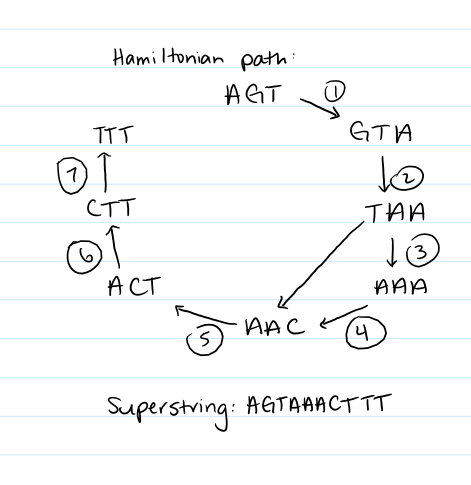

In [109]:
Image('hamiltonian_path.png')

## 1.2) Construct a de Bruijin graph with 8 edges corresponding to these 3-mers and find an Eulerian path (8 edges) which visits each edge exactly once. Write the superstring corresponding to this Eulerian path.

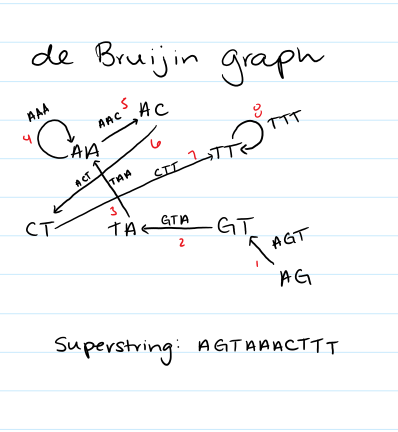

In [110]:
Image('deBruijin_graph.png')

# Question 2: You are given a text file with reads coming from a transcript sequence. Write a program to (1) break the reads into 30-mers and (2) use de Bruijin graph and Eulerian path walk to assemble the 30-mers.

In [41]:
def make_kmers(sequences, kmer_len):
    kmers = []
    for seq in sequences:
        for i in range(len(seq)):
            subseq = seq[i:i+kmer_len]
            if len(subseq) == kmer_len:
                if subseq in kmers:
                    pass
                else:
                    kmers.append(subseq)
    return kmers

In [97]:
def make_node_dict(kmers):
    '''
    This fxn takes a list of kmers that have been generated by make_kmers fxn and gives a dictionary of nodes. 
    node_dict = {node_seq: index}
    Indices are arbitrary, but should be kept constant
    '''
    node_dict = {}
    n = 0
    for kmer in kmers: 
        if kmer[0:-1] not in node_dict:
            node_dict[kmer[0:-1]] = n
            n += 1
        if kmer[1:] not in node_dict:
            node_dict[kmer[1:]] = n
            n += 1
        if kmer[0:-1] in node_dict:
            node_dict = node_dict
        if kmer[1:] in node_dict:
            node_dict = node_dict
    return node_dict

In [98]:
def make_edges_list(kmers, node_dict):
    edge_list = []
    for kmer in kmers: 
        coordinates = []
        coordinates.append(node_dict.get(kmer[0:-1]))
        coordinates.append(node_dict.get(kmer[1:]))
        coordinates = tuple(coordinates)
        if (coordinates,kmer) not in edge_list:
            edge_list.append((coordinates, kmer))
    return edge_list

In [99]:
def eulerian_make_edges_graph(kmers, node_dict):
    '''
    This fxn takes a list of kmers and makes it into a eulerian circuit so it can be sorted by networkx
    It returns the start and end nodes as well so you know which node to start with to construct your sequence later
    '''
    G = nx.DiGraph()
    coordinates = []
    #First, make the list of edges
    for kmer in kmers: 
        coordinate = []
        coordinate.append(node_dict.get(kmer[0:-1]))
        coordinate.append(node_dict.get(kmer[1:]))
        coordinates.append(coordinate)
        G.add_edge(coordinate[0], coordinate[1])
    coordinates = list(coordinates)
#     print(coordinates)   
#     print(list(G.edges()))

    #Next, find the beginning and end coordinates
    start = 0
    end = 0
    for key, value in node_dict.items():
        times_in = 0
        times_out = 0
        for coordinate in coordinates:
            if coordinate[0] == value:
                times_in += 1 
            if coordinate[1] == value:
                times_out += 1
        if times_in < times_out:
            start = value
        if times_in > times_out:
            end = value
        else: 
            pass
    #Make into a eulerian circuit so you can use the networkx code
    coordinates.append((start,end))
    G.add_edge(start,end)
    eulerian_sorted_list = list(nx.eulerian_circuit(G, source = start))
    return (eulerian_sorted_list)


In [100]:
def construct_seq_from_eulerian_path(eulerian_path, edge_list):
    sequence = []
    for coordinate in eulerian_path:
        for i in edge_list:
            if sequence == []:
                if coordinate == i[0]:
                    sequence += i[1][:]
            else:
                if coordinate == i[0]:
                    sequence += i[1][-1:]
    sequence =''.join(sequence)
    return sequence

In [111]:
##Test example
# simple_seqs = ['AGTAAACTTT', 'GTAAACTTTA', 'CTTTAGTG']
# threemers = make_kmers(simple_seqs, 5)
# print(threemers)
# simple_seqs_node_dict = make_node_dict(threemers)
# print(simple_seqs_node_dict)
# edge_list = make_edges_list(threemers, simple_seqs_node_dict)
# print(edge_list)
# eulerian_edge_list = eulerian_make_edges_graph(threemers, simple_seqs_node_dict)
# print(eulerian_edge_list)
# threemer_seq = construct_seq_from_eulerian_path(eulerian_edge_list, edge_list)
# print(threemer_seq)

In [112]:
PS2_2sequences = (open('BI183_PS2_Q2', 'r').read().split('\n'))
thirtymers = make_kmers(PS2_2sequences, 30)
node_dict = make_node_dict(thirtymers)
edge_list = make_edges_list(thirtymers, node_dict)
# print(edge_list)
eulerian_edge_list = eulerian_make_edges_graph(thirtymers, node_dict)
final_seq = construct_seq_from_eulerian_path(eulerian_edge_list, edge_list)
print(final_seq)

ccgacgtggatatcccgggaggtcactctccccgggctctgtcctagtggcgagcgggagcttagggcattgcccggtgatgtacagtccctttccacaacgttggagataaagctgggctttcgagtctgcgcctgcatattcctacgacttctcagagtcctgtggaccatgactgaggagacaaaccatgcaggaaacagtt


# Question 3: You are given a splicing graph below, how many possible paths are there connecting the 5’ end all the way to 3’ end? Draw the isoforms corresponding to these paths.

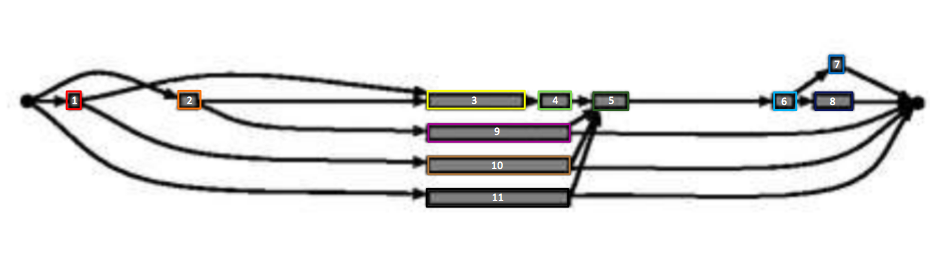

In [113]:
Image('Problem_3_paths.png')

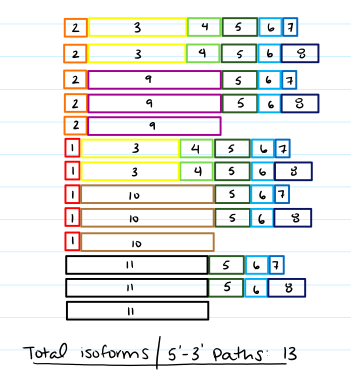

In [114]:
Image('Problem_3_isoforms.png')

# Question 4: Consider the sequences v = TACGGGTAT and w = GACGTACG. Assume that the match premium is +1 and that the mismatch and indel penalties are -1.

## 4.1) Fill out the dynamic programming table for a global alignment between v and w. Write down ALL the alignments with the maximal score.

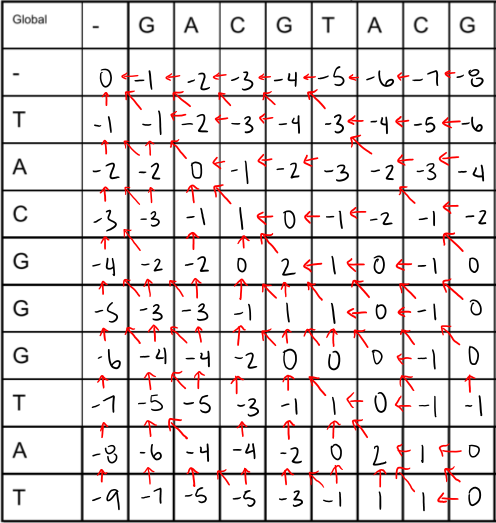

In [115]:
Image('global_alignment.png')

Alignments with maximal score: 


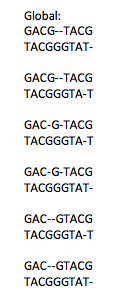

In [121]:
Image('global_alignments.png')

## 4.2) Fill out the dynamic programming table for a local alignment between v and w.Write down ALL the alignments with the maximal score.

In [116]:
Image('local_alignment.png')

In [122]:
Image('local_alignments.png')

# Question 5: Human Caspase 1 is a member of the Caspase gene family and its activation will induce cell apoptosis (you can find out more here: http://www.ncbi.nlm.nih.gov/gene/834). In this question, you will identify the location of several sequences in the CASP1 gene by alignment. The FASTA sequence of the gene is provided. (Note: first remove the header and the line breaks since it’s one continuous sequence) Using dynamic programming, create an alignment graph and scoring matrix to find the global and local alignments of the following sequence and report any differences if they exist: “ATCTCAAACACATGCGGGACCCCAGATA”

In [118]:
def global_alignment(ref_seq, search_seq):
    #Make a matrix full of zeros that is the len(ref_seq)+1 and len(search_seq+1)
    global_graph = np.zeros((len(search_seq)+2, len(ref_seq)))
    #This graph will tell where the score came from.
    position_graph = np.zeros((len(search_seq)+2, len(ref_seq)), dtype= object)
    
    #Initialize graph
    icount = 0
    for i in range(0, len(search_seq)+2):
        global_graph[i,0]= icount
        icount -= 1
        
    jcount = 0
    for j in range(0,len(ref_seq)):
        global_graph[0,j] = jcount
        jcount -= 1
 
    #Fill in the graph according to rules. At each position, calc score for match/mismatch or indel. Take greatest. 
    for i in range(1, len(search_seq)+2):
        for j in range(1, len(ref_seq)):
            d = global_graph[i-1,j-1]
            a = global_graph[i-1, j]-1
            l = global_graph[i,j-1]-1
            
            #First, determine if you have a match or mismatch and calc. diagonal from that
            if ref_seq[i-1] == search_seq[j-1]:
                d += 1
            else: 
                d -= 1
                
            #1st scenario: diagonal is greater than above and left     
            if d > a and d > l:
                global_graph[i,j]= d
                #Position graph (diagonal, left, above)
                position_graph[i,j] = (1,0,0)
            #2nd scenario: left is greater than diagonal and above
            if l > d and l > a:
                global_graph[i,j] = l
                position_graph[i,j] = (0,1,0)
            #3rd scenario: above is greater than diagonal and left
            if a > d and a > l:
                global_graph[i,j] = l
                position_graph[i,j]= (0,0,1)
            #4th scenario: 
            if d == a and d > l:
                global_graph[i,j] = d
                position_graph[i,j] = (1,0,1)
            #5th scenario
            if d == l and d > a:
                global_graph[i,j] = d
                position_graph[i,j] = (1,1,0)
            #6th scenario
            if a == l and a > d:
                global_graph[i,j]= a
                position_graph[i,j] = (0,1,1)
            #7th scenario
            if a == l == d:
                global_graph[i,j] = a
                position_graph[i,j] = (1,1,1)
    return global_graph, position_graph

Proof that the global alignment scoring system works:

In [311]:
print(global_alignment('TACGGGTAT','GACGTACG')[0])
ga = global_alignment('TACGGGTAT','GACGTACG')
print('Global alignment graph')
print(ga[0])    
print('Global alignment coordinate graph')
print(ga[1])

[[  0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.]
 [ -1.  -1.  -2.  -3.  -4.  -3.  -4.  -5.  -6.]
 [ -2.  -2.   0.  -1.  -2.  -3.  -2.  -3.  -4.]
 [ -3.  -3.  -4.   1.   0.  -1.  -2.  -1.  -2.]
 [ -4.  -2.  -3.  -4.   2.   1.   0.  -1.   0.]
 [ -5.  -3.  -3.  -4.  -5.   1.   0.  -1.   0.]
 [ -6.  -4.  -4.  -4.  -3.  -4.   0.  -1.   0.]
 [ -7.  -8.  -5.  -5.  -6.  -2.  -3.  -1.  -2.]
 [ -8.  -8.  -9.  -6.  -6.  -7.  -1.  -2.  -2.]
 [ -9.  -9.  -9. -10.  -7.  -5.  -6.  -2.  -3.]]
Global alignment graph
[[  0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.]
 [ -1.  -1.  -2.  -3.  -4.  -3.  -4.  -5.  -6.]
 [ -2.  -2.   0.  -1.  -2.  -3.  -2.  -3.  -4.]
 [ -3.  -3.  -4.   1.   0.  -1.  -2.  -1.  -2.]
 [ -4.  -2.  -3.  -4.   2.   1.   0.  -1.   0.]
 [ -5.  -3.  -3.  -4.  -5.   1.   0.  -1.   0.]
 [ -6.  -4.  -4.  -4.  -3.  -4.   0.  -1.   0.]
 [ -7.  -8.  -5.  -5.  -6.  -2.  -3.  -1.  -2.]
 [ -8.  -8.  -9.  -6.  -6.  -7.  -1.  -2.  -2.]
 [ -9.  -9.  -9. -10.  -7.  -5.  -6.  -2.  -3.]]
Global alignmen

In [119]:
def local_alignment(ref_seq, search_seq):
    #Make a matrix full of zeros that is the len(ref_seq)+1 and len(search_seq+1)
    local_graph = np.zeros((len(search_seq)+2, len(ref_seq)))
    #This graph will tell where the score came from.
    position_graph = np.zeros((len(search_seq)+2, len(ref_seq)), dtype= object)
    
    #Fill in the graph according to rules. At each position, calc score for match/mismatch or indel. Take greatest. 
    for i in range(1, len(search_seq)+2):
        for j in range(1, len(ref_seq)):
            d = local_graph[i-1,j-1]
            a = local_graph[i-1, j]-1
            l = local_graph[i,j-1]-1
            
            #First, determine if you have a match or mismatch and calc. diagonal from that
            if ref_seq[i-1] == search_seq[j-1]:
                d += 1
            else: 
                d -= 1
                
            #1st scenario: diagonal is greater than above and left     
            if d > a and d > l:
                if d >= 0:
                    local_graph[i,j]= d
                else:
                    local_graph[i,j] = 0
                #Position graph (diagonal, left, above)
                position_graph[i,j] = (1,0,0)
            #2nd scenario: left is greater than diagonal and above
            if l > d and l > a:
                if a >= 0:
                    local_graph[i,j] = a
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (0,1,0)
            #3rd scenario: above is greater than diagonal and left
            if a > d and a > l:
                if a >= 0:
                    local_graph[i,j] = l
                else:
                    local_graph = 0 
                position_graph[i,j]= (0,0,1)
            #4th scenario: 
            if d == a and d > l:
                if d >= 0:
                    local_graph[i,j] = d
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (1,0,1)
            #5th scenario
            if d == l and d > a:
                if d >= 0:
                    local_graph[i,j] = d
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (1,1,0)
            #6th scenario
            if a == l and a > d:
                if a >= 0:
                    local_graph[i,j]= a
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (0,1,1)
            #7th scenario
            if a == l == d:
                if a >= 0:
                    local_graph[i,j] = a
                else:
                    local_graph[i,j] = 0
                position_graph[i,j] = (1,1,1)
    return local_graph, position_graph

Proof that the local alignment scoring system works:

In [310]:
la = local_alignment('TACGGGTAT','GACGTACG')
print('Local alignment graph')
print(la[0])    
print('Local alignment coordinate graph')
print(la[1])

Local alignment graph
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  2.  0.  0.]
 [ 0.  0. -1.  2.  0.  0. -1.  3.  0.]
 [ 0.  1.  0. -1.  3.  0.  0. -1.  4.]
 [ 0.  1.  0.  0. -1.  2.  0.  0. -1.]
 [ 0.  1.  0.  0.  1.  0.  1.  0.  1.]
 [ 0. -1.  0.  0. -1.  2.  0.  0. -1.]
 [ 0.  0.  0.  0.  0. -1.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  2.  0.]]
Local alignment coordinate graph
[[0 0 0 0 0 0 0 0 0]
 [0 (1, 1, 1) (1, 1, 1) (1, 1, 1) (1, 1, 1) (1, 0, 0) (0, 1, 0) (1, 1, 1)
  (1, 1, 1)]
 [0 (1, 1, 1) (1, 0, 0) (0, 1, 0) (1, 1, 1) (0, 0, 1) (1, 0, 0) (0, 1, 0)
  (1, 1, 1)]
 [0 (1, 1, 1) (0, 0, 1) (1, 0, 0) (0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 0, 0)
  (0, 1, 0)]
 [0 (1, 0, 0) (0, 1, 0) (0, 0, 1) (1, 0, 0) (0, 1, 0) (1, 1, 0) (0, 0, 1)
  (1, 0, 0)]
 [0 (1, 0, 0) (1, 1, 0) (1, 1, 0) (0, 0, 1) (1, 0, 0) (0, 1, 0) (1, 1, 0)
  (0, 0, 1)]
 [0 (1, 0, 0) (1, 1, 0) (1, 1, 1) (1, 0, 0) (0, 0, 1) (1, 0, 0) (0, 1, 0)
  (1, 0, 0)]
 [0 (0, 0, 

I wasn't able to troublehsoot through my traceback function to get it working. I am going to tell you conceptually what should happen for the algorithm in hopes that it might earn me some of the points. 
In my global and local alignment graph functions I have it create what I called a "position matrix," which was a matrix of the same size as the alignment matrix and at each position of the "position matrix" I stored where I got the score at that position. Since there are 3 ways that the score could come from, I made it a set of 3 "coordinates." The "coordinates" are (diagonal, left, above) and are filled in with a 1 or a 0 to indicate whether or not the score came from those positions. For example, a score that came only from the diagonal would have the coordinate (1,0,0), and a score that could have come from all three positions would be (1,1,1). 
For the traceback algorithm, it is essentially a depth-first search. You start the search function at the bottom right corner (or in the case of the local alignment the largest number position) and follow the coordinate system- so if it was (1,0,0), you would look next to the position diagonal to the previous. When you reach a point that there is a bifurcation (for example, (1,1,0), you store the node where you had to make the decision, then you call your search function again (so you are calling your search function within itself). You trace back all the way through the tree of paths this way until you reach the end. You then use this information to reconstruct the entire path. Then you return back to the point where you last had a bifurcating node and make the alternate decision at the bifurcation and go the next time. 

# Question 6 

## 6.1) Assume you used BLAST algorithm BLASTN to get the following peptide sequence alignment. Based on the scoring rule below, calculate the alignment score


In [120]:
sum_scores = (-1)+4+0+4+1+(-4)+2+5+(-1)+2+(-4)+(-1)+(-1)+(-1)+(-2)+4+(-2)+(-1)+8
print(sum_scores)

12


## 6.2) Original BLAST - seed and extend. Use the CASP1 sequence from question 5 for this question.

In [123]:
PS2_question5 = (open('PS2_Q5_Sequence.txt', 'r').read().rstrip("\n"))
PS2_question5 = PS2_question5.replace('\n', '')
target_seq1 = 'TCAGGTCACTCCATGCACAT'
target_seq2 = 'CAGTTCTGATTCTTTAATGG'
target_seq3 = 'AACTCAAG'
target_seq4 = 'CATTAATT'
ex_seq = 'TGGGTG'

In [247]:
def seed_extend(search_seq, ref_seq):
    len_ss = len(search_seq)
    half_ss = int(len_ss/2)
    back_half = half_ss - 2
    front_half = half_ss + 1
    m4 = search_seq[back_half:front_half]

    #find the 4mers in the big sequence 
    m4_indices = [m.start() for m in re.finditer(m4, ref_seq)]
#     print(m4_indices)
    
    #Seed and extend from each index where the 
    full_match_indices = []
    
    for i in m4_indices:
#         print(i)
        start = i
        end = i + 4
        front_half = half_ss + 2
        back_half =  half_ss - 2
        
        while ref_seq[start:end] == search_seq[back_half: front_half]:
            #Seed 1 backward. If they match, move the start back one
            if ref_seq[start-1:end] == search_seq[back_half-1: front_half]:
                start = start -1
                back_half = back_half -1
            else:
                break
            #Seed one forward. If they match, move the end forward one.   
            if ref_seq[start:end+1] == search_seq[back_half: front_half+1]:
                end = end +1
                front_half = front_half +1
            else:
                break 
        
        if ref_seq[start:end] == search_seq:
            full_match_indices.append((start,end-1))
    
    return full_match_indices

# test = seed_extend(ex_seq, PS2_question5)
# print(test)
print(seed_extend(target_seq1, PS2_question5))
print(seed_extend(target_seq2, PS2_question5))
print(seed_extend(target_seq3, PS2_question5))
print(seed_extend(target_seq4, PS2_question5))

[(1990, 2009)]
[(1401, 1420)]
[(7621, 7628), (7632, 7639), (10237, 10244)]
[(3649, 3656), (4619, 4626)]


### 6.3.B) Identify the location of the following non-exact matching sequences using the approach from part a. After identify the seeds, extend until mismatch score reach 50%. Report the top 5 best alignments, which one is likely the true alignment?

In [143]:
target_seq5 = 'TTTATCCAATAATGGACACGTT'
target_seq6 = 'CATAAATTTCACAAAACATATG'

In [322]:
def seed_extend_threshold(search_seq, ref_seq, threshold = 0.5):
    #find the middle 4mer
    len_ss = len(search_seq)
    half_ss = int(len_ss/2)
    original_back_half = half_ss - 2
    original_front_half = half_ss + 2
    m4 = search_seq[original_back_half:original_front_half]
#     print('m4 is %s' %m4)

    search_seq_len = len(search_seq)
#     print(search_seq_len)

    #find the 4mers in the big sequence
    m4_indices = [m.start() for m in re.finditer(m4, ref_seq)]

    #Seed and extend from each index where the 
    threshold_match_indices = []
    for i in m4_indices:
        #initialize starting indices
        start = i
        end = i + 4
        front_half = original_front_half
        back_half =  original_back_half
        #initialize match/mismatch scores
        match = 4
        mismatch = 0
        
        
#         while match/(mismatch+match) > threshold and len(ref_seq[start:end]) < search_seq_len:
        while len(ref_seq[start:end]) < search_seq_len:
            #Extend left. If they match add 1 to match, and if they don't add one to mismatch
            if ref_seq[start-1:end][0] == search_seq[back_half-1: front_half][0]:
                start = start -1
                back_half = back_half -1
                match += 1
            else:
                start = start -1
                back_half = back_half -1
                mismatch += 1

            #Extend right. If they match, add 1 to match, and if they don't add one to mismatch
            if ref_seq[start:end+1][-1] == search_seq[back_half: front_half+1][-1]:
                end = end +1
                front_half = front_half + 1
                match += 1
            else:
                end = end +1
                front_half = front_half + 1
                mismatch += 1 
        if len(ref_seq[start:end]) == search_seq_len:        
            threshold_match_indices.append(((start, end), ref_seq[start: end], (match/(mismatch+match))))
    
    return threshold_match_indices

# print(seed_extend_threshold('AAAAAAAAAAAAA', 'ATAATATTAATATAAAAATTATTAAAAATTTAT'))                                                         
# print(seed_extend_threshold(target_seq5, PS2_question5))
# print(seed_extend_threshold(target_seq6, PS2_question5))


In [303]:
seqs = [target_seq5, target_seq6]
for seq in seqs: 
    threshold_match_indices = seed_extend_threshold(seq, PS2_question5)
    threshold_match_indices= sorted(threshold_match_indices, key=itemgetter(2), reverse = True)
#     print (threshold_match_indices)
    print('The top 5 alignments for sequence %s is' %seq)
    for i in range(5):
        print(threshold_match_indices[i])
    

The top 5 alignments for sequence TTTATCCAATAATGGACACGTT is
((6160, 6182), 'TTTATCCAATAATGGACAAGTC', 0.9090909090909091)
((9912, 9934), 'ATCTTCCAATAATGCTCTTCTT', 0.6363636363636364)
((11120, 11142), 'TTTTTGAAATAATAAATCTGGT', 0.5909090909090909)
((3704, 3726), 'TTGGTCATATAATTTTCTTTTT', 0.5454545454545454)
((6542, 6564), 'TTGACTCAGTAATGCCACTGTC', 0.5454545454545454)
The top 5 alignments for sequence CATAAATTTCACAAAACATATG is
((8852, 8874), 'CCTTAATTTCACAAAACATTTG', 0.8636363636363636)
((5052, 5074), 'ATTTTATCTCACACATTTTTTG', 0.5454545454545454)
((6796, 6818), 'CGCCCAGAGCACAAGACCTCTG', 0.5454545454545454)
((1833, 1855), 'CAGAATTGGCACAGGAGGAGTA', 0.5)
((4361, 4383), 'TATTGTTTTCACACTTCTTTAT', 0.5)


# Extra Credit 3) Consider the sequences, match scores, and mismatch and indeed penalties from problem 4. Now consider the three semi-global alignments (a), (b), and (c) where in case of (a) we do not penalize gaps at the 5'end of sequence v, in case of (b) we do not penalize gaps at the 3'end of sequence v, and in case of (c) we do not penalize gaps at both ends of sequence v. Fill out the dynamic programming tables for (a) and (b) and write down ALL the alignments with the maximal score for both cases.

## EC3A) Do not penalize gaps at 5' end of sequence V. 

In [318]:
Image('5Vnogappen.jpg')

Since there are no gaps in the 5' end of the sequence alignment, the alignments look the same as those in the global alignment of 4. 

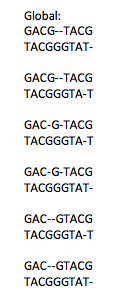

In [319]:
Image('global_alignments.png')

## EC3B) Do not penalize gaps at 3' end of sequence V.
The graph looks exactly the same as the gloabal alignment, but we trace back from the max number of the bottom row. 

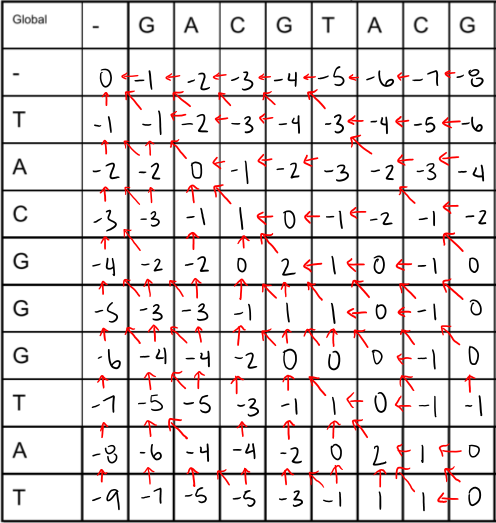

In [320]:
Image('global_alignment.png')

In [321]:
Image('semi_local_alignment.png')

## EC3C) Do not penalize gaps at 5' or 3' end of sequence V.
The graph looks just like the graph where you don't penalize the 5' end of V (Extra credit question 3A), but the alignments look just like in part B. This is because there were no gap penalties in the 5' end so you only end up penalizing at the 3' end. 

# Extra Credit 4) How many different semi-global alignments exist if we allow, independently for each of the two sequences, to not penalize gaps at the 5'end, at the 3'end, or at both ends? Hint: There are more than only four different possibilities. List these possibilities and specify for each of them (a) the initialization of the dynamic programming table and (b) the end-point of the optimal semi-global alignment.

To read the table: 
- No penalties of tells you what you are not penalizing for. 
    - For example: 5'V means you are not penalizing for the 5' end of sequence V. 
- Initialization
    - GP tells you to fill in gap penalties (i.e. recursively fill in -1,-2,-3...)
    -'0' tells you to fill in with 0's 
    - Row/Column tells you whether you are filling in the first row or first column of the matrix with gap penalties or 0s 
- Endpoint
    - Bottom right corner: end point is bottom right corner 
    -Start max last row: Look at the bottom row of the matrix and find the max score. Start traceback from that point. 
    -Start max last column: Look at the last column of the matrix to find the max score. Start traceback from that point. 
    

| No Penalties of: | Initialization- Row 0 | Initialization-Column 0 | Endpoint                     |
|------------------|-----------------------|-------------------------|------------------------------|
| Penalize all     | GP                    | GP                      | Bottom right corner          |
| 5'V              | 0                     | GP                      | Bottom right corner          |
| 5'W              | GP                    | 0                       | Bottom right corner          |
| 3'V              | GP                    | GP                      | Start max last row           |
| 3'W              | GP                    | GP                      | Start max last column        |
| 5'V 3'V          | 0                     | GP                      | Start max last row           |
| 5'W 3' W         | GP                    | 0                       | Start max last column        |
| 5'V 3'W          | 0                     | GP                      | Start max last comun         |
| 3'V 5'W          | GP                    | 0                       | Start max last row           |
| 5'V 5'W          | 0                     | 0                       | Bottom right corner          |
| 3'V 3'W          | GP                    | GP                      | Start max last column or row |
| 5'V 3'V 5'W 3'W  | 0                     | 0                       | Start max last column or row |
| 5'V 3'V 5'W      | 0                     | 0                       | Start max last row           |
| 5'V 3V' 3'W      | 0                     | GP                      | Start max column or row      |
| 5'V 5'W 3'W      | 0                     | 0                       | Start max last column        |
| 3'V 5'W 3'W      | GP                    | 0                       | Start max last column or row |